In [2]:
!pip install scikit-learn
!pip install numpy pandas matplotlib seaborn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.7 MB 11.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.4/8.7 MB 8.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.0/8.7 MB 7.9 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 8.0 MB/s eta 0:00:00


In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'land'])
    plt.show()

In [5]:
df = pd.read_csv("dataset_part_3.csv")
df.head()

,Class,FlightNumber,PayloadMass,Year,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,...,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,Outcome_False Ocean,Outcome_False RTLS,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS
0,0.0,1.0,6104.959412,2010.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,2.0,525.000000,2012.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,3.0,677.000000,2013.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,4.0,500.000000,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,3170.000000,2013.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
Y = df['Class'].to_numpy()
Y[:10]

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [8]:
X = df.drop('Class', axis=1)
X.head()

,FlightNumber,PayloadMass,Year,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,...,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,Outcome_False Ocean,Outcome_False RTLS,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS
0,1.0,6104.959412,2010.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,525.000000,2012.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,677.000000,2013.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,500.000000,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,2013.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.71291154e+00, -1.94814463e-16, -3.39038414e+00,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01, -5.68796459e-01, -4.10890702e-01,
        -1.50755672e-01, -1.05999788e-01, -1.50755672e-01,
         1.93309133e+00, -9.14732034e-01, -2.42535625e-01,
        -4.29197538e-01],
       [-1.67441914e+00, -1.19523159e+00, -2.46991786e+00,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01, -5.68796459e-01, -4.10890702e-01,
        -1.50755672e-01, -1.05999788e-01, -1.50755672e-01,
         1.93309133e+00, -9.14732034e-01, -2.42535625e-01,
        -4.29197538e-01],
       [-1.63592675e+00, -1.16267307e+00, -2.00968472e+00,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
    

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2
)

Y_test.shape

(18,)

In [11]:
parameters = {'C':[0.01,0.1,1],
              'penalty':['l2'],
              'solver':['lbfgs']}

lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Best parameters:", logreg_cv.best_params_)
print("Best accuracy (validation):", logreg_cv.best_score_)

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy (validation): 0.9571428571428571


Test Accuracy: 1.0


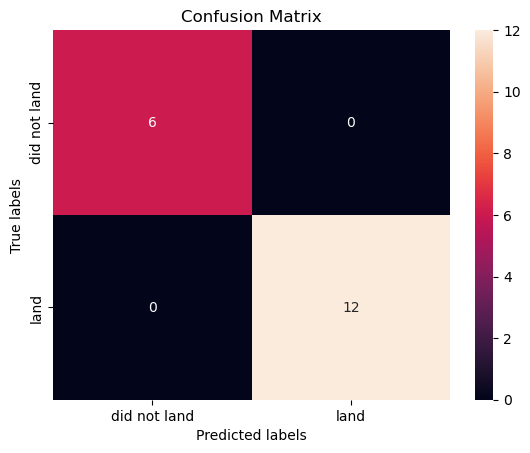

In [12]:
print("Test Accuracy:", logreg_cv.score(X_test, Y_test))

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [13]:
parameters = {
    'kernel':['linear','rbf','poly','sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("Best parameters:", svm_cv.best_params_)
print("Best accuracy (validation):", svm_cv.best_score_)

Best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.001), 'kernel': 'linear'}
Best accuracy (validation): 1.0


Test Accuracy: 1.0


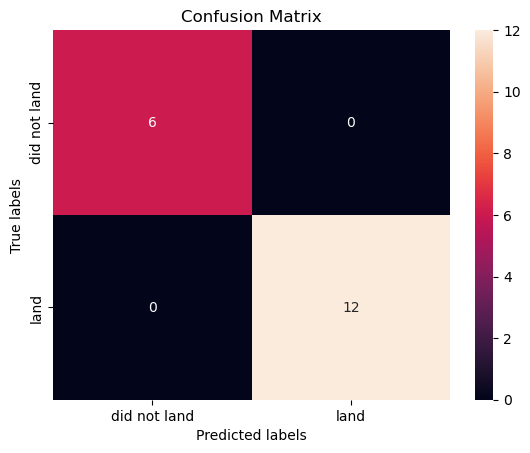

In [14]:
print("Test Accuracy:", svm_cv.score(X_test, Y_test))

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [15]:
parameters = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2*n for n in range(1,10)],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10]
}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("Best parameters:", tree_cv.best_params_)
print("Best accuracy (validation):", tree_cv.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best accuracy (validation): 0.9732142857142858


\\?\C:\Users\kunju\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "\\?\C:\Users\kunju\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "\\?\C:\Users\kunju\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "\\?\C:\Users\kunju\AppData\Roaming\jupyterlab-des